In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def preprocess_value(val):
    try:
        return float(val)
    except ValueError:
        return np.nan  # return NaN if can't convert

In [3]:
def read_file(filename):
    with open(filename, 'r') as f:
        contents = f.read()

    data_dict = {}
    for line in contents.splitlines():
        key, values_str = line.split(' : ')
        # Convert the string representation of the list to an actual list of floats
        values = [preprocess_value(val) for val in values_str.strip('[]').split(',')]
        data_dict[key] = values

    return data_dict

In [4]:
def check_anomalies(data_list):
    """Checks the data dictionary for anomalies and prints the count of np.nan values."""
    
    nan_count = 0
    anomaly_indexes = []
    
    for i in range(len(data_list)):
        if np.isnan(data_list[i]):
            nan_count += 1
            anomaly_indexes.append(i)
        
    return anomaly_indexes

def find_data_at_index(filename, target_index):
    """Find the data at a specific index in the txt file."""
    
    with open(filename, 'r') as f:
        contents = f.read()

    current_index = 0

    for line in contents.splitlines():
        _, values_str = line.split(' : ')
        values = values_str.strip('[]').split(',')
        
        # Check if target_index is within the current line's values
        if current_index + len(values) > target_index:
            # Extract and preprocess the value
            value_at_index = values[target_index - current_index]
            return value_at_index
        
        current_index += len(values)

    return None

In [5]:
def average_every_step(data_list, averaging):
    averaged_data = []
    
    for i in range(0, len(data_list), averaging):
        chunk = data_list[i:i+averaging]
        if len(chunk) == averaging:
            averaged_data.append(sum(chunk) / averaging)
        else:
            print(f"Drop last {len(chunk)} data because length of data ({len(data_list)}) is not divided by averaging({averaging})")
            
    return averaged_data

In [6]:
def plot_data(filename, plot_range_start=0, plot_range_end=None, average=1, layout='vertical', num_plot_threshold = 100000):
    data = read_file(filename)
    
    # Define the range to plot
    if plot_range_end is None:
        plot_range_end = len(data['psnr'])
    
    averaged_psnr = average_every_step(data['psnr'][plot_range_start:plot_range_end], average)
    averaged_loss = average_every_step(data['loss'][plot_range_start:plot_range_end], average)
    
    if len(averaged_psnr) > num_plot_threshold and num_plot_threshold != 0:
        raise ValueError(f"Length of data to plot ({len(averaged_psnr)}) is larger than threshold ({num_plot_threshold}).\
            If you want to plot forcely, set num_plot_threshold to larger one or 0 (force mode)")
    
    x_psnr = [i*average + plot_range_start for i in range(len(averaged_psnr))]
    
    plt.figure(figsize=(12, 6))
    
    if layout == 'vertical':
        plt.subplot(2, 1, 1)
    elif layout == 'horizontal':
        plt.subplot(1, 2, 1)
    else:
        raise ValueError(f'Wrong Layout : {layout}. layout supports "vertical" and "horizontal" mode')
    
    plt.plot(x_psnr, averaged_psnr, marker='o', color='b', label='PSNR')
    plt.title('Average PSNR vs Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('PSNR')
    plt.grid(True)
    plt.legend()

    x_loss = [i*average + plot_range_start for i in range(len(averaged_loss))]
    
    if layout == 'vertical':
        plt.subplot(2, 1, 2)
    elif layout == 'horizontal':
        plt.subplot(1, 2, 2)
    else:
        raise ValueError(f'Wrong Layout : {layout}. layout supports "vertical" and "horizontal" mode')
    
    plt.plot(x_loss, averaged_loss, marker='o', color='r', label='Loss')
    plt.title('Average Loss vs Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    
    plt.savefig('result.png', dpi=500)
    plt.show()

In [7]:
def sanity_checker(data_path):
    data_dict = read_file(data_path)

    print(f"Initialize Sanity Check...")

    for key in data_dict.keys():
        print(f"\nSanity Checking On {key}")
        
        anomaly_indexes = check_anomalies(data_dict[key])

        if len(anomaly_indexes) == 0:
            print("No Anomalies Detected.")

        else:
            print(f"{len(anomaly_indexes)} Anomalies Are Detected. Indexes Are : {anomaly_indexes}")
            
            for index in anomaly_indexes:
                print(f"\nFind {index}th Number In Data")
                value = find_data_at_index(data_path, index)
                print(f"Data at Index {index} Is: {value}")

In [8]:
data_path = "/home/gbang/jihyoun/NeRF/test_nerf/230831123428_lego_200K_qp-15_e2_lr0p0001_decay0.5_N20000_blender/result.txt"

In [9]:
sanity_checker(data_path)

Initialize Sanity Check...

Sanity Checking On psnr
No Anomalies Detected.

Sanity Checking On loss
No Anomalies Detected.


Drop last 33 data because length of data (37933) is not divided by averaging(50)
Drop last 33 data because length of data (37933) is not divided by averaging(50)


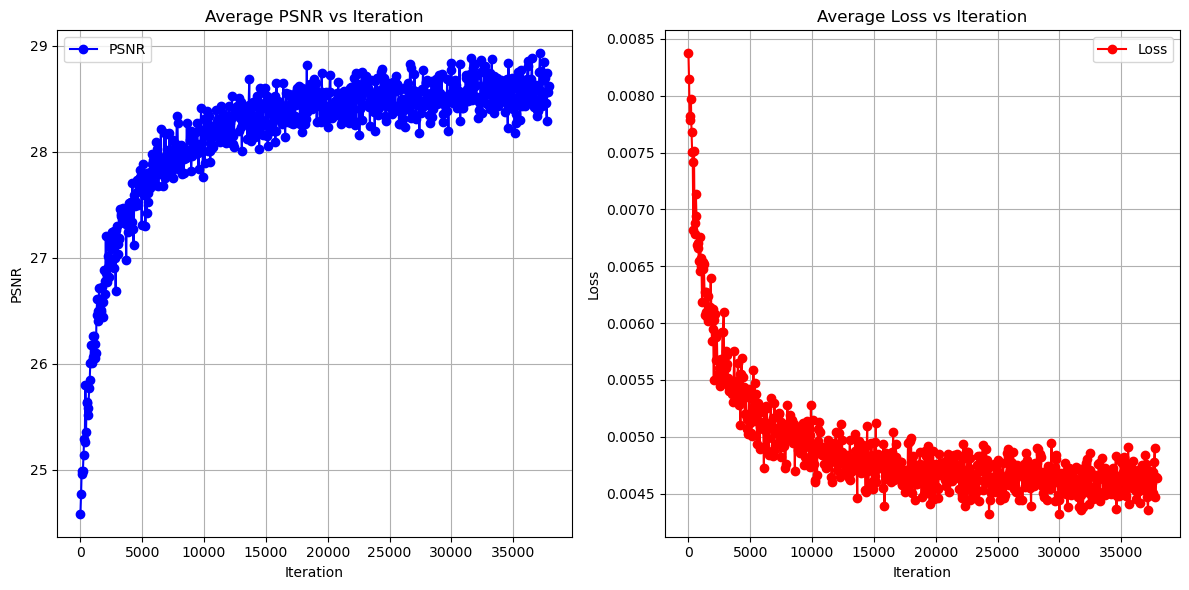

In [10]:
plot_data(data_path, 
          plot_range_start=0,
          plot_range_end=None,
          average = 50,
          layout='horizontal',
          num_plot_threshold=0
          )